In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
import scipy.stats as stats

In [2]:
eda_LR = pd.read_csv("/home/apprenant/PycharmProjects/pythonProject2/EDA/02-Row/eda_LR.csv")

In [3]:
eda_LR.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,2,2008,208500,65.0,196.0,2003.0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,5,2007,181500,80.0,0.0,1976.0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,9,2008,223500,68.0,162.0,2001.0


In [4]:
'''Selecting features to train model'''
X=eda_LR.drop(['LotFrontage',
                'MasVnrArea',
                'GarageYrBlt',
               'SalePrice'],axis=1)
y=eda_LR['SalePrice']

'''We set the size of the train set to 75%. And the rest is for the test set.
We set the split NOT in random.'''

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,  train_size = 0.75)


'''# Here we train the model only on the train dataset.'''
model_LR = LinearRegression().fit(X_train, y_train)

'''# And now we compare both scores :'''
print('for several criteria scores are : ')
print("\nScore for the Train dataset :", model_LR.score(X_train, y_train))
print("Score for the Test dataset :", model_LR.score(X_test, y_test))


for several criteria scores are : 

Score for the Train dataset : 0.8012252433958189
Score for the Test dataset : 0.8197277151480304


   ### prediction for sale price:

In [7]:
eda_LR['p_SalePrice']=model_LR.predict(eda_LR.drop(['LotFrontage',
                'MasVnrArea',
                'GarageYrBlt',
                'SalePrice'],axis=1))

 ### plotting SalePrice and Predicted SalePrice:

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

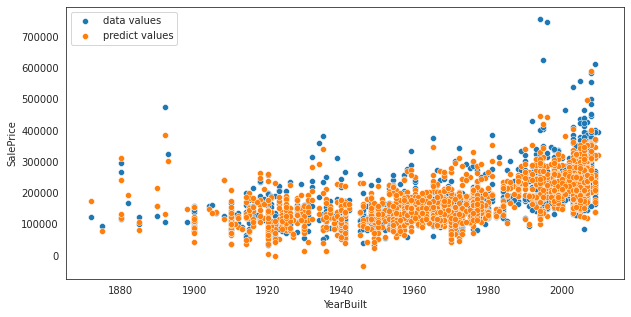

In [16]:
sns.set_style('white', {'legend.frameon':True})
plt.figure(figsize=(10, 5))
sns.scatterplot(x=eda_LR['YearBuilt'],y =eda_LR['SalePrice'],label="data values",)
sns.scatterplot(x=eda_LR['YearBuilt'],y =eda_LR['p_SalePrice'],label="predict values",)
